Cambiar todos los audios a misma freceuncia

In [ ]:
import os
import parselmouth
from parselmouth.praat import call

def resample_audio(input_path, output_path, target_rate=48000):
    try:
        sound = parselmouth.Sound(input_path)
        current_rate = sound.sampling_frequency
        
        if current_rate != target_rate:
            # Resample audio
            resampled_sound = call(sound, "Resample", target_rate, 50)
            resampled_sound.save(output_path, 'WAV')
            print(f"Archivo {os.path.basename(input_path)} convertido de {current_rate} Hz a {target_rate} Hz.")
        else:
            # Save the original file without modification
            sound.save(output_path, 'WAV')
            print(f"Archivo {os.path.basename(input_path)} ya estaba a {target_rate} Hz y se guardó sin cambios.")
    except Exception as e:
        print(f"Error al procesar el archivo {os.path.basename(input_path)}: {e}")

def convert_and_save_all(directory, output_directory, target_rate=48000):
    os.makedirs(output_directory, exist_ok=True)
    files_checked = 0
    files_saved = 0

    for file_name in os.listdir(directory):
        if file_name.endswith('.wav'):
            input_path = os.path.join(directory, file_name)
            output_path = os.path.join(output_directory, file_name)
            
            resample_audio(input_path, output_path, target_rate)
            files_checked += 1
            files_saved += 1

    print(f"Archivos revisados: {files_checked}")
    print(f"Archivos guardados en la nueva carpeta: {files_saved}")

# Ruta a la carpeta con los archivos de audio
input_folder = 'todos_los_audios'
# Ruta a la carpeta donde se guardarán todos los archivos (convertidos o no)
output_folder = 'audios_resampled'

convert_and_save_all(input_folder, output_folder)

Comprobar que todos los audios estén en la misma frecuencia

In [ ]:
import os
import parselmouth
from parselmouth.praat import call

def resample_audio(input_path, output_path, target_rate=48000):
    try:
        sound = parselmouth.Sound(input_path)
        current_rate = sound.sampling_frequency
        
        if current_rate != target_rate:
            # Resample audio
            resampled_sound = call(sound, "Resample", target_rate, 50)
            resampled_sound.save(output_path, 'WAV')
            print(f"Archivo {os.path.basename(input_path)} convertido de {current_rate} Hz a {target_rate} Hz.")
        else:
            # Save the original file without modification
            sound.save(output_path, 'WAV')
            print(f"Archivo {os.path.basename(input_path)} ya estaba a {target_rate} Hz y se guardó sin cambios.")
    except Exception as e:
        print(f"Error al procesar el archivo {os.path.basename(input_path)}: {e}")

def convert_and_save_all(directory, output_directory, target_rate=48000):
    os.makedirs(output_directory, exist_ok=True)
    files_checked = 0
    files_saved = 0

    for file_name in os.listdir(directory):
        if file_name.endswith('.wav'):
            input_path = os.path.join(directory, file_name)
            output_path = os.path.join(output_directory, file_name)
            
            resample_audio(input_path, output_path, target_rate)
            files_checked += 1
            files_saved += 1

    print(f"Archivos revisados: {files_checked}")
    print(f"Archivos guardados en la nueva carpeta: {files_saved}")

# Ruta a la carpeta con los archivos de audio
input_folder = 'todos_los_audios'
# Ruta a la carpeta donde se guardarán todos los archivos (convertidos o no)
output_folder = 'audios_resampled'

convert_and_save_all(input_folder, output_folder)

In [9]:
import parselmouth

def get_audio_duration(file_path):
    try:
        sound = parselmouth.Sound(file_path)
        duration = sound.duration  # Duración en segundos
        print(f"Duración del archivo '{file_path}': {duration} segundos")
    except Exception as e:
        print(f"Error al cargar el archivo '{file_path}': {e}")

# Ruta al archivo de audio
audio_file = 'audios_resampled/21audio_64.wav'
get_audio_duration(audio_file)


Duración del archivo 'audios_resampled/21audio_64.wav': 4.642979166666667 segundos


In [18]:
import parselmouth
import os

def find_max_duration(audio_dir):
    max_duration = 0
    for file in os.listdir(audio_dir):
        file_path = os.path.join(audio_dir, file)
        if file_path.lower().endswith('.wav'):  # Asegurarse de que es un archivo WAV
            try:
                sound = parselmouth.Sound(file_path)
                duration = sound.duration
                if duration > max_duration:
                    max_duration = duration
            except Exception as e:
                print(f"Error al cargar el archivo '{file_path}': {e}")
    return max_duration

# Ruta a la carpeta que contiene los archivos de audio
audio_dir = 'audios_resampled'
max_duration = find_max_duration(audio_dir)
print(f"Duración máxima encontrada: {max_duration} segundos")


Duración máxima encontrada: 18.058979166666667 segundos


In [12]:
import parselmouth

def check_number_of_channels(file_path):
    try:
        # Cargar el archivo de audio
        sound = parselmouth.Sound(file_path)
        # Obtener el número de canales
        num_channels = sound.n_channels
        # Imprimir el número de canales
        print(f"El archivo '{file_path}' tiene {num_channels} canal(es).")
    except Exception as e:
        print(f"Error al procesar el archivo '{file_path}': {e}")

# Ruta del archivo de audio que quieres comprobar
file_path = 'audios_resampled/21audio_64.wav'  # Cambia esto a la ruta de tu archivo

# Comprobar el número de canales
check_number_of_channels(file_path)


El archivo 'audios_resampled/21audio_64.wav' tiene 2 canal(es).


In [28]:
import os
import numpy as np
import parselmouth

def preprocess_and_save_audio(file_path, max_length, output_dir):
    try:
        # Cargar el archivo de audio
        sound = parselmouth.Sound(file_path)
        
        # Obtener la tasa de muestreo
        sample_rate = sound.sampling_frequency
        
        # Obtener el número de canales
        num_channels = sound.n_channels
        
        # Convertir el audio a un array de numpy
        audio_array = sound.values
        
        # Verificar el contenido del array de audio
        if audio_array.size == 0:
            print(f"El archivo '{file_path}' está vacío.")
            return
        
        # Si el audio tiene 2 canales, tomar solo el primer canal para simplificar
        if num_channels == 2:
            # Asegurarse de tomar el canal correcto dependiendo de la forma del array
            if audio_array.shape[0] == 2:  # Formato (2, N)
                audio_array = audio_array[0, :]  # Tomar el primer canal (canal izquierdo)
            elif audio_array.shape[1] == 2:  # Formato (N, 2)
                audio_array = audio_array[:, 0]  # Tomar el primer canal (canal izquierdo)
        
        # Calcular el número de muestras
        num_samples = len(audio_array)
        
        # Ajustar la longitud del audio
        if num_samples > max_length:
            audio_array = audio_array[:max_length]
        else:
            audio_array = np.pad(audio_array, (0, max_length - num_samples), mode='constant')
        
        # Crear un nuevo objeto Sound con el array de audio ajustado
        new_sound = parselmouth.Sound(audio_array, sampling_frequency=sample_rate)
        
        # Verificar las propiedades del nuevo objeto Sound
        print(f"Duración del nuevo sonido: {new_sound.duration} segundos")
        print(f"Número de canales del nuevo sonido: {new_sound.n_channels}")
        print(f"Forma del array de valores del nuevo sonido: {new_sound.values.shape}")
        
        # Guardar el archivo de audio procesado en la carpeta de salida
        output_file_path = os.path.join(output_dir, os.path.basename(file_path))
        new_sound.save(output_file_path, format="WAV")
        
        print(f"Archivo procesado y guardado en: {output_file_path}")
    except Exception as e:
        print(f"Error al procesar el archivo '{file_path}': {e}")

# Ruta de los archivos de audio
audio_dir = 'audios_resampled'
output_dir = 'padded'

# Crear la carpeta de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Define la longitud máxima en muestras
max_length = int(max_duration * 48000)  # Frecuencia de muestreo de 48,000 Hz

# Preprocesar y guardar todos los audios
for file in os.listdir(audio_dir):
    if file.endswith('.wav'):
        file_path = os.path.join(audio_dir, file)
        preprocess_and_save_audio(file_path, max_length, output_dir)


Duración del nuevo sonido: 18.058979166666667 segundos
Número de canales del nuevo sonido: 1
Forma del array de valores del nuevo sonido: (1, 866831)
Archivo procesado y guardado en: padded\10audio_10.wav
Duración del nuevo sonido: 18.058979166666667 segundos
Número de canales del nuevo sonido: 1
Forma del array de valores del nuevo sonido: (1, 866831)
Archivo procesado y guardado en: padded\10audio_11.wav
Duración del nuevo sonido: 18.058979166666667 segundos
Número de canales del nuevo sonido: 1
Forma del array de valores del nuevo sonido: (1, 866831)
Archivo procesado y guardado en: padded\10audio_12.wav
Duración del nuevo sonido: 18.058979166666667 segundos
Número de canales del nuevo sonido: 1
Forma del array de valores del nuevo sonido: (1, 866831)
Archivo procesado y guardado en: padded\10audio_13.wav
Duración del nuevo sonido: 18.058979166666667 segundos
Número de canales del nuevo sonido: 1
Forma del array de valores del nuevo sonido: (1, 866831)
Archivo procesado y guardado e

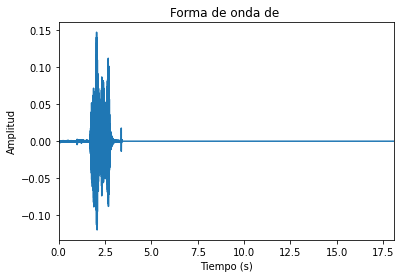

Forma de onda demostrada.


In [9]:
import os
import parselmouth
import matplotlib.pyplot as plt

# Ruta a la carpeta que contiene los archivos .wav
carpeta = "padded/1audio_2.wav"


# Leer el archivo .wav con parselmouth
snd = parselmouth.Sound(carpeta)

# Crear el gráfico de forma de onda
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Forma de onda de ")
plt.show()
print(f"Forma de onda demostrada.")
    

In [ ]:
import os
import parselmouth
import matplotlib.pyplot as plt

# Ruta al archivo de audio
archivo = "audios_resampled/4audio_16.wav"

# Leer el archivo .wav con parselmouth
snd = parselmouth.Sound(archivo)

# Crear una figura con dos subgráficos
plt.figure(figsize=(12, 6))

# Graficar el primer canal (canal izquierdo)
plt.subplot(2, 1, 1)
if snd.n_channels == 2:
    plt.plot(snd.xs(), snd.values[:, 0], color='blue')
    plt.title("Canal Izquierdo")
else:
    plt.plot(snd.xs(), snd.values, color='blue')
    plt.title("Canal Único")
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

# Graficar el segundo canal (canal derecho) si existe
plt.subplot(2, 1, 2)
if snd.n_channels == 2:
    plt.plot(snd.xs(), snd.values[:, 1], color='orange')
    plt.title("Canal Derecho")
else:
    plt.title("No hay canal derecho")
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

print("Forma de onda demostrada.")



In [9]:
import numpy as np
import parselmouth

def check_audio_shape(file_path):
    try:
        sound = parselmouth.Sound(file_path)
        print(f"Shape of sound.values: {np.shape(sound.values)}")
    except Exception as e:
        print(f"Error: {e}")

# Reemplaza con tu archivo de audio
check_audio_shape('todos_los_audios/9audio_75.wav')


Shape of sound.values: (2, 100751)


In [26]:
import parselmouth

# Ruta al archivo de audio
archivo = "audios_resampled/4audio_16.wav"

# Leer el archivo .wav con parselmouth
snd = parselmouth.Sound(archivo)

print(f"Dimensiones de snd.values: {snd.values.shape}")
print(f"Número de canales: {snd.n_channels}")
print(f"Tamaño de tiempo (xs): {len(snd.xs())}")


Dimensiones de snd.values: (2, 111119)
Número de canales: 2
Tamaño de tiempo (xs): 111119


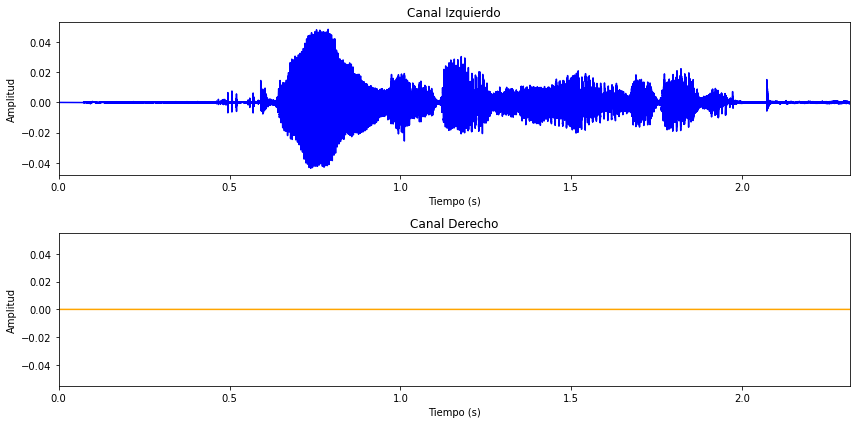

Forma de onda demostrada.


In [29]:
import os
import parselmouth
import matplotlib.pyplot as plt

# Ruta al archivo de audio
archivo = "todos_los_audios/4audio_16.wav"

# Leer el archivo .wav con parselmouth
snd = parselmouth.Sound(archivo)

# Crear una figura con dos subgráficos
plt.figure(figsize=(12, 6))

# Verificar el número de canales y graficar
if snd.n_channels == 2:
    # Graficar el primer canal (canal izquierdo)
    plt.subplot(2, 1, 1)
    plt.plot(snd.xs(), snd.values[0, :], color='blue')  # Usar el primer canal
    plt.title("Canal Izquierdo")
    plt.xlim([snd.xmin, snd.xmax])
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")

    # Graficar el segundo canal (canal derecho)
    plt.subplot(2, 1, 2)
    plt.plot(snd.xs(), snd.values[1, :], color='orange')  # Usar el segundo canal
    plt.title("Canal Derecho")
    plt.xlim([snd.xmin, snd.xmax])
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
else:
    # Graficar un solo canal si no hay segundo canal
    plt.subplot(1, 1, 1)
    plt.plot(snd.xs(), snd.values, color='blue')
    plt.title("Canal Único")
    plt.xlim([snd.xmin, snd.xmax])
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

print("Forma de onda demostrada.")


In [33]:
import parselmouth
import numpy as np

def analyze_audio(file_path):
    # Cargar el archivo de audio
    sound = parselmouth.Sound(file_path)
    
    # Obtener los valores de amplitud
    audio_array = sound.values
    
    # Imprimir la forma del array y los primeros valores
    print(f"Forma del array de valores: {audio_array.shape}")
    print(f"Primeros valores: {audio_array[:, :10]}")  # Para archivos estéreo
    print(f"Amplitud mínima: {np.min(audio_array)}")
    print(f"Amplitud máxima: {np.max(audio_array)}")
    print(f"Media de amplitudes: {np.mean(audio_array)}")
    print(f"Desviación estándar: {np.std(audio_array)}")

# Ejemplo de uso
analyze_audio('padded/4audio_16.wav')


Forma del array de valores: (1, 866831)
Primeros valores: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Amplitud mínima: -0.04364013671875
Amplitud máxima: 0.0484619140625
Media de amplitudes: 1.2128437566333575e-07
Desviación estándar: 0.0025877942488968146


NORMALIZAR DATOS

In [ ]:
import os
import numpy as np
import parselmouth

def preprocess_and_save_audio(file_path, output_dir):
    try:
        # Cargar el archivo de audio
        sound = parselmouth.Sound(file_path)
        
        # Obtener la tasa de muestreo
        sample_rate = sound.sampling_frequency
        
        # Convertir el audio a un array de numpy
        audio_array = sound.values.flatten()  # Asegurarse de que sea un array 1D
        
        # Normalizar los valores del audio a un rango de -1 a 1
        audio_array = audio_array - np.mean(audio_array)  # Centrar en 0
        audio_array = audio_array / np.max(np.abs(audio_array))  # Normalizar a -1 a 1
        
        # Crear un nuevo objeto Sound con el array de audio ajustado
        new_sound = parselmouth.Sound(audio_array, sampling_frequency=sample_rate)
        
        # Verificar las propiedades del nuevo objeto Sound
        print(f"Duración del nuevo sonido: {new_sound.duration} segundos")
        print(f"Número de canales del nuevo sonido: {new_sound.n_channels}")
        print(f"Forma del array de valores del nuevo sonido: {new_sound.values.shape}")
        
        # Guardar el archivo de audio procesado en la carpeta de salida
        output_file_path = os.path.join(output_dir, os.path.basename(file_path))
        new_sound.save(output_file_path, format="WAV")
        
        print(f"Archivo procesado y guardado en: {output_file_path}")
    except Exception as e:
        print(f"Error al procesar el archivo '{file_path}': {e}")

# Ruta de los archivos de audio
audio_dir = 'padded'
output_dir = 'normalized'

# Crear la carpeta de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Preprocesar y guardar todos los audios
for file in os.listdir(audio_dir):
    if file.endswith('.wav'):
        file_path = os.path.join(audio_dir, file)
        preprocess_and_save_audio(file_path, output_dir)


INPUT PARA EL MODELO (no funcionó por ocupar demasiada memoria)

In [ ]:
import numpy as np
import pandas as pd
import parselmouth
import os
import h5py

# Ruta a la carpeta con los archivos de audio normalizados
audio_dir = 'padded'
# Ruta al archivo CSV con las etiquetas
csv_file = 'data.csv'

def load_audio(file_path):
    """ Cargar un archivo de audio y devolver un array de numpy """
    sound = parselmouth.Sound(file_path)
    audio_array = sound.values.flatten()  # Aplanar el array a una dimensión
    return audio_array

def prepare_data(audio_dir, csv_file):
    """ Preparar los datos para la red neuronal """
    # Cargar el archivo CSV con las etiquetas
    df = pd.read_csv(csv_file)
    
    # Inicializar listas para las características y etiquetas
    X = []
    y = []
    
    # Iterar sobre cada fila del DataFrame
    for _, row in df.iterrows():
        audio_file = os.path.join(audio_dir, row['nombre'])
        
        if os.path.exists(audio_file):
            # Cargar el audio
            audio_array = load_audio(audio_file)
            
            # Verificar si el array está vacío
            if audio_array.size == 0:
                print(f"El archivo '{audio_file}' está vacío.")
                continue
            
            # Agregar los datos a la lista
            X.append(audio_array)
            
            # Convertir las etiquetas a formato binario
            labels = row[1:].astype(int).values
            y.append(labels)
    
    # Convertir listas a arrays de numpy
    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.float32)
    
    
    
    return X, y

# Preparar los datos
X, y = prepare_data(audio_dir, csv_file)






Input para ell modelo con hdf5 para solucionar probema de memoria

In [2]:
import numpy as np
import pandas as pd
import parselmouth
import os
import h5py

# Ruta a la carpeta con los archivos de audio normalizados
audio_dir = 'padded'
# Ruta al archivo CSV con las etiquetas
csv_file = 'data.csv'
# Ruta al archivo HDF5 para almacenar los datos
hdf5_file = 'data.h5'

def load_audio(file_path):
    """ Cargar un archivo de audio y devolver un array de numpy """
    sound = parselmouth.Sound(file_path)
    audio_array = sound.values.flatten()  # Aplanar el array a una dimensión
    return audio_array

def process_and_save_to_hdf5(audio_dir, csv_file, hdf5_file, batch_size):
    """ Procesar datos en lotes y guardar en HDF5 """
    # Cargar el archivo CSV con las etiquetas
    df = pd.read_csv(csv_file)
    num_samples = len(df)
    
    # Crear el archivo HDF5
    with h5py.File(hdf5_file, 'w') as f:
        # Crear datasets para almacenar los datos
        X_dset = f.create_dataset('X', (num_samples, 866831), dtype=np.float32)
        y_dset = f.create_dataset('y', (num_samples, 9), dtype=np.float32)
        
        start_idx = 0
        
        # Procesar los datos en lotes
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_df = df.iloc[start:end]
            
            X_batch = []
            y_batch = []
            
            for _, row in batch_df.iterrows():
                audio_file = os.path.join(audio_dir, row['nombre'])
                
                if os.path.exists(audio_file):
                    audio_array = load_audio(audio_file)
                    
                    if audio_array.size == 0:
                        continue
                    
                    X_batch.append(audio_array)
                    labels = row[1:].astype(int).values
                    y_batch.append(labels)
            
            X_batch = np.array(X_batch, dtype=np.float32)
            y_batch = np.array(y_batch, dtype=np.float32)
            
            X_dset[start_idx:start_idx + len(X_batch)] = X_batch
            y_dset[start_idx:start_idx + len(y_batch)] = y_batch
            start_idx += len(X_batch)

# Configurar el tamaño de lote
batch_size = 10
# Procesar y guardar los datos
process_and_save_to_hdf5(audio_dir, csv_file, hdf5_file, batch_size)


Cargar los datos uan vez han sido guardados

In [1]:
import h5py
import numpy as np
import pandas as pd
import parselmouth
import os
import h5py

def load_data_from_hdf5(hdf5_file):
    """ Cargar datos desde un archivo HDF5 """
    with h5py.File(hdf5_file, 'r') as f:
        X = np.array(f['X'], dtype=np.float32)
        y = np.array(f['y'], dtype=np.float32)
    
    return X, y

# Cargar los datos desde el archivo HDF5
X, y = load_data_from_hdf5('data.h5')

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")


Forma de X: (1870, 866831)
Forma de y: (1870, 9)


Ver un elemento

In [3]:
# Estadísticas del primer elemento de X
first_element = X[0]
print("Estadísticas del primer elemento de X:")
print(f"Min: {np.min(first_element)}")
print(f"Max: {np.max(first_element)}")
print(f"Mean: {np.mean(first_element)}")
print(f"Std: {np.std(first_element)}")


Estadísticas del primer elemento de X:
Min: -0.119964599609375
Max: 0.1473388671875
Mean: -8.610240001871716e-06
Std: 0.006894820835441351


Ver que todos los elementos están entre -1 y 1 por lo cual no hay que normalizar (se intentó normalizar y quedaban valores muy pequeños)

In [14]:
import numpy as np

# Supongamos que X es tu array de datos de audio
# Encuentra el mínimo y máximo de todos los elementos en X
min_value = np.min(X)
max_value = np.max(X)

print(f"Valor mínimo en X: {min_value}")
print(f"Valor máximo en X: {max_value}")

# Verificar si todos los valores están en el rango de -1 a 1
if min_value >= -1 and max_value <= 1:
    print("Todos los valores están en el rango de -1 a 1.")
else:
    print("Hay valores fuera del rango de -1 a 1.")


Valor mínimo en X: -1.0
Valor máximo en X: 0.999969482421875
Todos los valores están en el rango de -1 a 1.


Ver que en X no haya valores nulos

In [43]:
import numpy as np

# Encuentra las muestras que son completamente ceros
zero_samples = np.where(np.all(X == 0, axis=1))[0]

if len(zero_samples) > 0:
    print(f"Hay {len(zero_samples)} muestras que son completamente ceros.")
    print(f"Índices de las muestras que son ceros: {zero_samples}")
else:
    print("No hay muestras que sean completamente ceros.")


No hay muestras que sean completamente ceros.


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D
from tensorflow.keras.layers import LeakyReLU, BatchNormalization, Flatten, MaxPooling1D, Input, Dropout

from sincnet_tensorflow import SincConv1D, LayerNorm

# Crear una subclase que extiende SincConv1D
class SincConv1DWithConfig(SincConv1D):
    def get_config(self):
        # Llama al método get_config de la superclase
        config = super(SincConv1DWithConfig, self).get_config()
        
        # Agrega los parámetros específicos de SincConv1D
        config.update({
            "N_filt": self.N_filt,
            "Filt_dim": self.Filt_dim,
            "fs": self.fs,
            "stride": self.stride,
            "padding": self.padding,
        })
        return config
    
class LayerNormWithConfig(LayerNorm):
    def get_config(self):
        config = super(LayerNormWithConfig, self).get_config()
    
        return config


out_dim = 9 #number of classes

sinc_layer = SincConv1DWithConfig(N_filt=64,
                        Filt_dim=129,
                        fs=48000,
                        stride=16,
                        padding="SAME")


inputs = Input((866831, 1)) 

x = sinc_layer(inputs)
x = LayerNormWithConfig()(x)  # Usa la clase LayerNormWithConfig

x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)


x = Conv1D(64, 3, strides=1, padding='valid')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(64, 3, strides=1, padding='valid')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(128, 3, strides=1, padding='valid')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(128, 3, strides=1, padding='valid')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Flatten()(x)
x = Dropout(0.3)(x)

x = Dense(256)(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dropout(0.5)(x)

prediction = Dense(out_dim, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=prediction)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 866831, 1)]       0         
_________________________________________________________________
sinc_conv1d_with_config (Sin (None, 54177, 64)         128       
_________________________________________________________________
layer_norm_with_config (Laye (None, 54177, 64)         128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 54177, 64)         0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27088, 64)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 27086, 64)         12352     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 27086, 64)         0     

In [5]:
from sklearn.model_selection import train_test_split

# Divide los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val)) #80 mins en ejecutar

Epoch 1/5
47/47 [==============================] - 339s 7s/step - loss: 0.7432 - binary_accuracy: 0.7072 - val_loss: 0.4359 - val_binary_accuracy: 0.7733
Epoch 2/5
47/47 [==============================] - 376s 8s/step - loss: 0.4404 - binary_accuracy: 0.7781 - val_loss: 0.4081 - val_binary_accuracy: 0.7766
Epoch 3/5
47/47 [==============================] - 390s 8s/step - loss: 0.3895 - binary_accuracy: 0.8009 - val_loss: 0.4015 - val_binary_accuracy: 0.7849
Epoch 4/5
47/47 [==============================] - 389s 8s/step - loss: 0.3518 - binary_accuracy: 0.8314 - val_loss: 0.3963 - val_binary_accuracy: 0.7894
Epoch 5/5
47/47 [==============================] - 389s 8s/step - loss: 0.3082 - binary_accuracy: 0.8598 - val_loss: 0.4029 - val_binary_accuracy: 0.7971


In [7]:
# Guardar un modelo de Keras en formato .h5
model.save('ProsodyNetwork.h5')


In [8]:
from tensorflow.keras.models import load_model
from sincnet_tensorflow import LayerNorm  # Asegúrate de cargar cualquier otra capa personalizada

# Cargar el modelo desde el archivo .h5
model = load_model('ProsodyNet.h5', custom_objects={
    'SincConv1DWithConfig': SincConv1DWithConfig,
    'LayerNormWithConfig': LayerNormWithConfig
})

In [20]:
from sklearn.metrics import f1_score

# Supongamos que y_true y y_pred son tus etiquetas verdaderas y las predicciones del modelo
y_pred = model.predict(X_val)
y_pred_binary = (y_pred > 0.4).astype(int)  # Convertir las probabilidades en etiquetas binarias

f1_scores = f1_score(y_val, y_pred_binary, average=None)  # F1 Score para cada etiqueta
average_f1_score = f1_score(y_val, y_pred_binary, average='macro')  # F1 Score promedio macro

print("F1 Score por etiqueta:", f1_scores)
print("F1 Score promedio (macro):", average_f1_score)


F1 Score por etiqueta: [0.82474227 0.81481481 0.85106383 0.88888889 0.85020243 0.91966759
 0.83902439 0.63829787 0.74285714]
F1 Score promedio (macro): 0.8188399140167939


In [21]:
import numpy as np

# Ejemplo de umbrales específicos para cada etiqueta
thresholds = [0.7, 0.5, 0.6, 0.45, 0.5, 0.7, 0.4, 0.7, 0.45]

# Suponiendo que y_pred tiene las probabilidades predichas (dimensión: [num_samples, 9])
y_pred_adjusted = np.zeros_like(y_pred)

for i in range(y_pred.shape[1]):
    y_pred_adjusted[:, i] = (y_pred[:, i] >= thresholds[i]).astype(int)

# y_pred_adjusted ahora tiene las predicciones finales con los umbrales ajustados


In [22]:
from sklearn.metrics import f1_score

# Calcula el F1 Score para cada etiqueta y el promedio
f1_scores = f1_score(y_val, y_pred_adjusted, average=None)
f1_macro = f1_score(y_val, y_pred_adjusted, average='macro')
f1_micro = f1_score(y_val, y_pred_adjusted, average='micro')

print("F1 Score para cada etiqueta:", f1_scores)
print("F1 Score macro promedio:", f1_macro)
print("F1 Score micro promedio:", f1_micro)


F1 Score para cada etiqueta: [0.85826772 0.86956522 0.86       0.89605735 0.87068966 0.93255132
 0.83902439 0.8125     0.75362319]
F1 Score macro promedio: 0.8546976483407994
F1 Score micro promedio: 0.869179600886918


In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Para cada etiqueta
for i in range(y_val.shape[1]):
    fpr, tpr, _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Label {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Guardar la imagen en un archivo
plt.savefig('curva_roc.png', dpi=300)  # Ajusta la resolución si es necesario
plt.close()  # Cerrar la figura para liberar recursos
